# Mô hình hồi quy tuyến tính
## Định nghĩa Mô hình hồi quy tuyến tính
*Xét mô hình hồi quy tuyến tính với biến đầu ra $y$ và $p$ biến đầu vào $x_1, x_2, ..., x_p$*
<br>
<br>
**Thành phần ngẫu nhiên** giả định rằng biến đầu ra $y_i$ có giá trị phương sai $\sigma^2$ ***cố định***. Mô hình có thể có một trọng số (đã biết) $w_i$ sao cho $var[y_i] = \frac{\sigma^2}{w_i}$ với $i=1,2,...n$
<br>
<br>
**Thành phần hệ thống** giả định rằng kỳ vọng $E[y_i]=\mu_i$ phụ thuộc tuyến tính vào các biến $x_i$ theo công thức $\mu_i=\beta_0+\sum_{j=1}^{p} \beta_jx_{ji}$
<br>
<br>
Công thức tổng quát của mô hình hồi quy tuyến tính
<br>
<center>$\begin{cases}
    var[y_i]=\sigma^2/w_i\\
    \mu_i=\beta_0+\displaystyle\sum_{j=1}^{p} \beta_jx_{ji}
  \end{cases}$</center>
<br>
Trong đó, $E[y_i]=\mu_i$ và $w_i$ đã biết. Từ dữ liệu đang có cần ước lượng $\beta_0,\beta_1,...,\beta_p$ và $\sigma^2$

Giả định của mô hình: <br>
- Phù hợp: Mô hình hồi quy phải phù hợp với tất cả các quan sát <br>
- Tuyến tính: Mối quan hệ giữa $\mu$ với mỗi biến định lượng phải là tuyến tính <br>
- Phương sai không đổi <br>
- Độc lập: Các giá trị đầu ra $y$ là độc lập với nhau

In [199]:
library(GLMsData); data("gestation"); str(gestation)

'data.frame':	21 obs. of  4 variables:
 $ Age   : int  22 23 25 27 28 29 30 31 32 33 ...
 $ Births: int  1 1 1 1 6 1 3 6 7 7 ...
 $ Weight: num  0.52 0.7 1 1.17 1.2 ...
 $ SD    : num  NA NA NA NA 0.121 NA 0.589 0.319 0.438 0.313 ...


In [ ]:
summary(gestation)

**Mô tả dữ liệu** <br>
Age: tuần tuổi <br>
Births: số lượng em bé được sinh ra ở tuần tuổi tương ứng <br>
Weight: cân nặng trung bình (kg) <br>
SD: độ lệch chuẩn (kg)

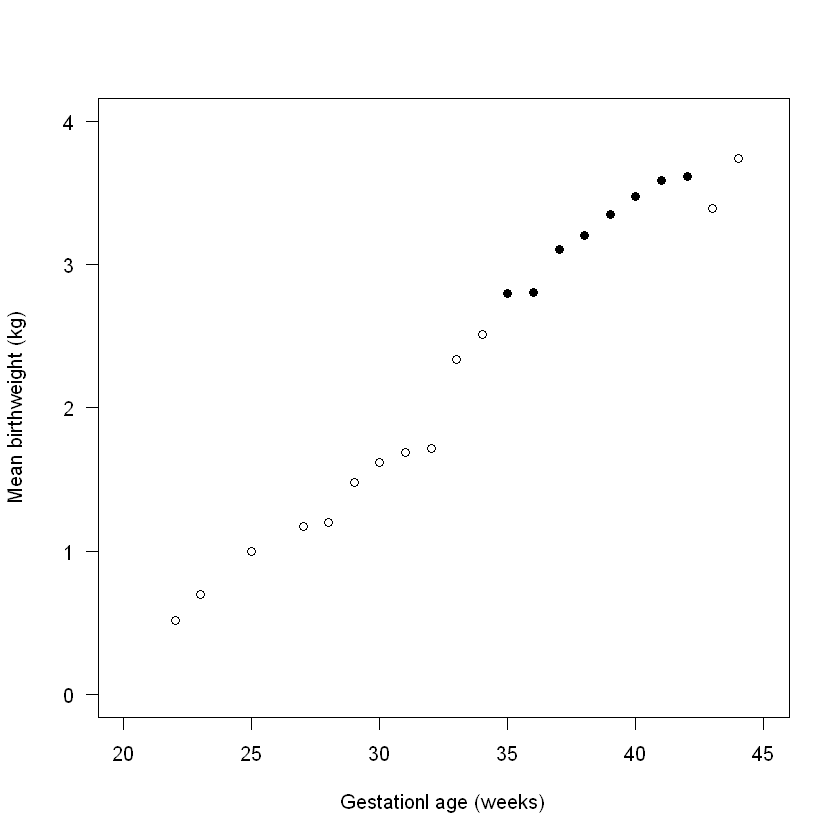

In [200]:
plot(Weight ~ Age, data = gestation, las = 1, pch = ifelse(Births < 20, 1, 19),
     xlab = "Gestationl age (weeks)", 
     ylab = "Mean birthweight (kg)",
     xlim = c(20, 45),
     ylim = c(0,4))

Gọi $m$ là số em bé sinh ra ở tuần tuổi tương ứng (**Note**: $m=Births$)

Biến đầu ra $y_i$ là trung bình của 1 bộ các quan sát <br>
Giả sử rằng mỗi em bé sinh ở $x_i$ tuần tuổi có phương sai $\sigma^2$ thì phương sai của 1 bộ các quan sát $y_i$ là $\sigma^2/m_i$ <br>
Mô hình hồi quy hợp lý cho tập dữ liệu: <br>
<center>$\begin{cases}
    var[y_i]=\sigma^2/m_i\\
    \mu_i=\beta_0+\beta_1x_i
  \end{cases}$</center>

Mô hình hồi quy sử dụng trọng số mang nhiều thông tin hơn so với mô hình hồi quy đơn

## Hồi quy tuyến tính đơn giản
Mô hình hồi quy tuyến tính đơn giản có dạng: <br>
<center>$\begin{cases}
    var[y_i]=\sigma^2/w_i\\
    \mu_i=\beta_0+\beta_1x_i
  \end{cases}$</center>
Trong đó $E[y_i]=\mu_i$ và $w_i$ đã biết, cần ước lượng $\sigma, \beta_0, \beta_1$


### Phương pháp bình phương nhỏ nhất
Phần dư $e_i$ là chệnh lệch giữa giá trị quan sát $y_i$ và giá trị kỳ vọng $\mu_i$. Ta có: <br>
<center>$e_i=y_i-\mu_i=y_i-\beta_0-\beta_1x_i$</center>
Phương pháp bình phương nhỏ nhất chọn giá trị $\beta_0$ và $\beta_1$ sao cho bình phương phần dư là nhỏ nhất (có nghĩa rằng khoảng cách từ các điểm quan sát đến đường thẳng ước lượng là nhỏ nhất) <br>
<center>$S(\beta_0,\beta_1)=\displaystyle\sum_{i=1}^{n} w_ie_i^2=\displaystyle\sum_{i=1}^{n} w_i(y_i-\mu_i)^2=\displaystyle\sum_{i=1}^{n} w_i(y_i-\beta_0-\beta_1x_i)^2$</center>

Công thức sử dụng trọng số $w_i$ vì giá trị trung bình của các **nhóm quan sát** có độ chính xác cao hơn giá trị của các quan sát **đơn lẻ** <br>
Xem xét các ví dụ:

In [201]:
y <- gestation$Weight
x <- gestation$Age
wts <- gestation$Births
beta0.A <- -0.9; beta1.A <- 0.1
mu.A <- beta0.A + beta1.A*x
SA <- sum(wts*(y-mu.A)^2); SA

[1] 186.1106

In [202]:
beta0.B <- -3; beta1.B <- 0.150
mu.B <- beta0.B + beta1.B*x
SB <- sum(wts*(y-mu.B)^2); SB

[1] 343.4433

In [203]:
beta0.C <- -2.678; beta1.C <- 0.1538
mu.C <- beta0.C + beta1.C*x
SC <- sum(wts*(y-mu.C)^2); SC

[1] 11.42575

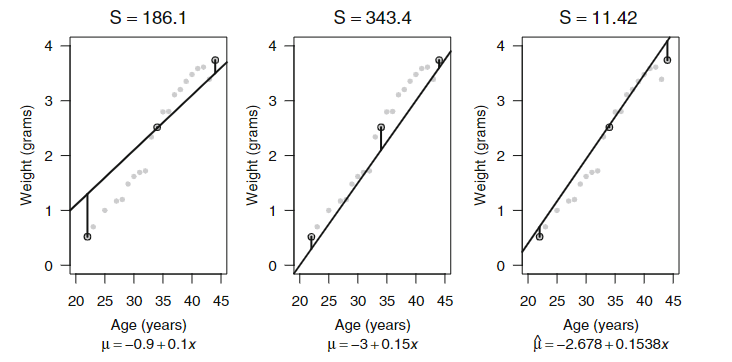

### Ước lượng các hệ số
Sử dụng đạo hàm để xác định giá trị nhỏ nhất của $S(\beta_0,\beta_1)$. Đạo hàm theo từng biến $\beta_0, \beta_1$ <br>
<center>$\cfrac{\partial(\beta_0,\beta_1)}{\partial\beta_0}=2\displaystyle\sum_{i=1}^{n} w_i(y_i-\mu_i)$</center>
<center>$\cfrac{\partial(\beta_0,\beta_1)}{\partial\beta_1}=2\displaystyle\sum_{i=1}^{n} w_ix_i(y_i-\mu_i)$</center>
Khi đạo hàm bằng 0, ta có <br>
<center>$\stackrel\frown{\beta}_0=\bar{y}_w-\stackrel\frown{\beta}_1\bar{x}_w$ <br> <br>
$\stackrel\frown{\beta}_1=\cfrac{SS_{xy}}{SS_x}=\cfrac{\sum_{i=1}^{n} w_i(x_i-\bar{x}_w)y_i}{\sum_{i=1}^{n} w_i(x_i-\bar{x}_w)^2}$</center>
trong đó $\bar{x}_w,\bar{y}_w$ là trung bình có trọng số <br>
<center>$\bar{x}_w=\cfrac{\sum_{i=1}^{n} w_ix_i}{\sum_{i=1}^{n} w_i} \quad và \quad \bar{y}_w=\cfrac{\sum_{i=1}^{n} w_iy_i}{\sum_{i=1}^{n} w_i}$</center>
$\stackrel\frown{\beta}_0, \stackrel\frown{\beta}_1$ lần lượt là ước lượng không chệch của $\beta_0$ và $\beta_1$
Giá trị cực tiểu của $S(\beta_0,\beta_1)$ đạt được khi $\beta_0=\stackrel\frown{\beta}_0$ và $\beta_1=\stackrel\frown{\beta}_1$ được gọi là Tổng bình phương phần dư (Residual sum-of-squares)
<center>$RSS=\displaystyle\sum_{i=1}^{n} w_i(y_i-\stackrel\frown{\mu}_i)^2=\displaystyle\sum_{i=1}^{n} w_i(y_i-\stackrel\frown{\beta}_0-\stackrel\frown{\beta}_ix_i)^2$

Xác định $\stackrel\frown{\beta}_0$ và $\stackrel\frown{\beta}_1$ từng bước theo công thức

In [204]:
xbar <- weighted.mean(x, w=wts)
SSx <- sum(wts*(x-xbar)^2)
ybar <- weighted.mean(y, w = wts)
SSxy <- sum(wts*(x-xbar)*y)
beta1 <- SSxy/SSx; beta0 <- ybar - beta1*xbar
mu <- beta0 + beta1*x
RSS <- sum(wts*(y-mu)^2)
c(beta0=beta0, beta1 = beta1, RSS = RSS)

beta0      beta1        RSS 
-2.6783891  0.1537594 11.4198322

Xác định $\stackrel\frown{\beta}_0$ và $\stackrel\frown{\beta}_1$ trên R

In [205]:
lm(Weight ~ Age, weights = Births, data = gestation)


Call:
lm(formula = Weight ~ Age, data = gestation, weights = Births)

Coefficients:
(Intercept)          Age  
    -2.6784       0.1538  


Xác định $RSS$ trên R

In [206]:
mod <- lm(Weight ~ Age, weights = Births, data = gestation)
deviance(mod)

[1] 11.41983

### Ước lượng phương sai $\sigma^2$
Theo định nghĩa mô hình hồi quy tuyến tính đơn giản: $\cfrac{\sigma^2}{w_i}=var[y_i]=E[(y_i-\mu_i)^2]$
mà $RSS=\sum_{i=1}^{n} w_i(y_i-\stackrel\frown{\mu}_i)^2$ dẫn tới: <br>
<center>$\stackrel\frown{\sigma}^2=\cfrac{RSS}{n}$</center>
Vì $\stackrel\frown{\mu}_i$ chỉ là giá trị ước lượng của $\mu_i$, bên cạnh đó phương pháp bình phương nhỏ nhất được áp dụng để ước lượng $\stackrel\frown{\mu}_i$ khiến giá trị RSS nhỏ hơn mức vốn có. Ta gọi $\stackrel\frown{\sigma}^2$ là ước lượng chệch của $\sigma^2$ <br>
Ước lượng không chệch của $\sigma^2$ được tính theo công thức:
<center>$s^2=\cfrac{RSS}{n-2}$</center>
Trong đó, $n-2$ được gọi là bậc tự do

**Vì sao lại là $n-2???$**

Xác định $s^2$ từng bước theo công thức

In [207]:
df <- length(y) - 2
s2 <- RSS/df
c(df=df,s=sqrt(s2),s2=s2)

df          s         s2 
19.0000000  0.7752701  0.6010438

Xác định $s^2$ trên R

In [208]:
summary(mod)


Call:
lm(formula = Weight ~ Age, data = gestation, weights = Births)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.62979 -0.60893 -0.30063 -0.08845  1.03880 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.678389   0.371172  -7.216 7.49e-07 ***
Age          0.153759   0.009493  16.197 1.42e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7753 on 19 degrees of freedom
Multiple R-squared:  0.9325,	Adjusted R-squared:  0.9289 
F-statistic: 262.3 on 1 and 19 DF,  p-value: 1.416e-12


### Độ lệch chuẩn của các hệ số
Công thức phương sai của các hệ số lần lượt là: <br>
<center>$var[\stackrel\frown{\beta}_0]=\sigma^2\left(\cfrac{1}{\sum w_i}+\cfrac{\bar{x}_w^2}{SS_x}\right) \quad và \quad var[\stackrel\frown{\beta}_1]=\cfrac{\sigma^2}{SS_x}$</center>
Vì $\sigma^2$ là chưa biết, thay bằng $s^2$ ta có công thức độ lệch chuẩn của các hệ số lần lượt là: <br>
<center>$se(\stackrel\frown{\beta}_0)=s\left(\cfrac{1}{\sum w_i}+\cfrac{\bar{x}_w^2}{SS_x}\right)^{1/2} \quad và \quad se(\stackrel\frown{\beta}_1)=\cfrac{s}{\sqrt{SS_x}}$</center>

## Hồi quy tuyến tính bội
### Ước lượng các hệ số
Trường hợp tổng quát có $p$ biến đầu vào và cần ước lượng $p+1$ hệ số <br>
Tương tự mô hình hồi quy tuyến tính đơn, bình phương phần dư được xác định bởi: <br>
<center>$S=\displaystyle\sum_{i=1}^{n} w_i(y_i-\mu_i)^2$</center>
Theo phương pháp bình phương nhỏ nhất, các giá trị $\beta_j$ tương ứng mà $S$ nhỏ nhất, ký hiệu: $\stackrel\frown{\beta}_0,...,\stackrel\frown{\beta}_p$ được xác định bởi đạo hàm: <br>
<center>$\cfrac{\partial S}{\partial\beta_j}=0 \quad với \quad j=0,1,...,p$</center> 

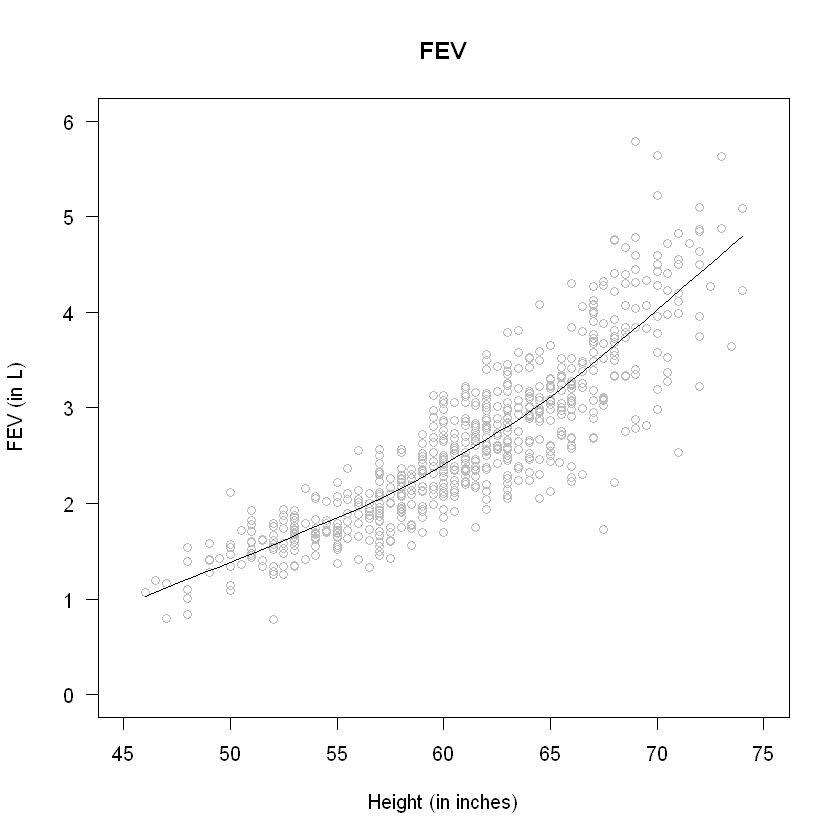

In [209]:
data(lungcap)
scatter.smooth(lungcap$Ht, lungcap$FEV, las = 1, col = "grey",
               ylim = c(0,6),
               xlim = c(45,75),
               main = "FEV",
               xlab = "Height (in inches)",
               ylab = "FEV (in L)")

Biểu đồ trên cho thấy mối quan hệ giữa FEV và Ht không phải là tuyến tính, nên mô hình tuyến tính sẽ không phù hợp. Điều chỉnh FEV thành log(FEV), biểu đồ sau cho thấy mối quan hệ giữa log(FEV) và Ht là tuyến tính

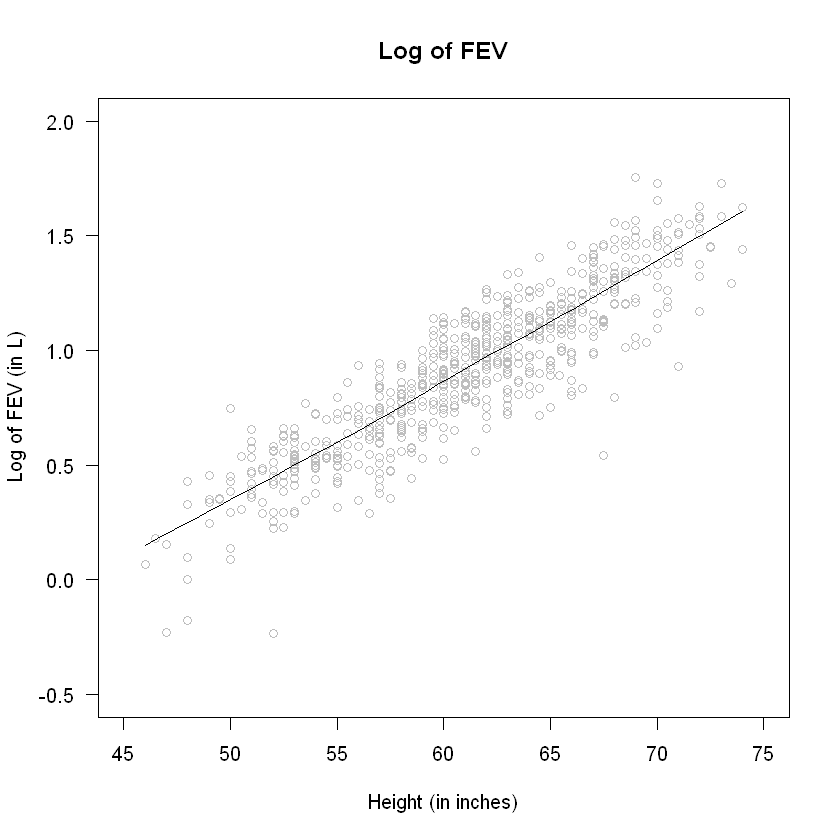

In [210]:
scatter.smooth(lungcap$Ht, log(lungcap$FEV), las = 1, col = "grey",
               ylim = c(-0.5,2),
               xlim = c(45,75),
               main = "Log of FEV",
               xlab = "Height (in inches)",
               ylab = "Log of FEV (in L)")

Giả sử sử dụng mô hình sau đây để ước lượng $log(FEV)$ theo các biến $Ht, Age, $ biến giả $gender$, biến giả $smoke$ lần lượt<br>
<center>$\begin{cases}
    var[y_i]=\sigma^2\\
    \mu_i=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_4 \quad (A)
  \end{cases}$</center>

### Ước lượng phương sai $\sigma^2$
Tương tự ước lượng phương sai cho mô hình hồi quy đơn, phương sai của mô hình hồi quy bội được xác định bởi công thức <br>
<center>$s^2=\cfrac{RSS}{n-p'}$</center>
trong đó $n-p'$ là bậc tự do ($p'$ là  số hệ số cần ước lượng)

## Phương pháp ma trận
### Giới thiệu về ma trận
$p'$ là số tham số cần ước lượng <br>
$n$ là số lượng quan sát <br>
Biểu diễn y qua ma trận $n\times1$ <br>
Biểu diễn x qua ma trận $n\times p'$ có dạng $X=[x_0,x_1,...,x_p]$ (trong đó $x_j$ là vecto $n\times1$ cho giá trị $x_j$ <br>
**Mô hình hồi quy tuyến tính có dạng** <br>
<center>$\begin{cases}
    var[y]=W^{-1}\sigma^2\\
    \mu=X\beta
  \end{cases}$</center>
$E[y]$ đã biết <br>
$W^{-1}$ là ma trận đối xứng kích cỡ $n\times n$ đã biết. Trường hợp đặc biệt: ma trận $W^{-1}$ có phần tử vị trí $(i,i)=1/w_i$, tất cả các phần tử khác của ma trận bằng 0 (ma trận đường chéo). Trường hợp thường xuyên xảy ra nhất khi trọng số của tất cả các quan sát bằng 1, khi đó $W^{-1}=I_n$ <br>

**Ví dụ**: biểu diễn dữ liệu gestation theo phương pháp ma trận
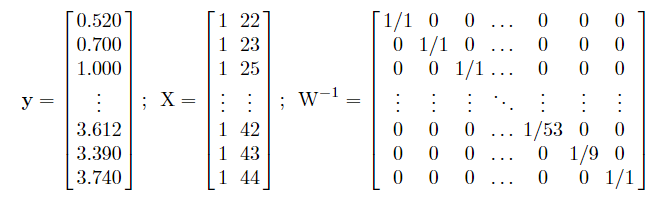

### Ước lượng hệ số
Sử dụng phương pháp đạo hàm trên ma trận <br>
Xét dữ liệu lungcap

In [211]:
lungcap$Smoke <- factor(lungcap$Smoke, 
                        levels = c(0,1),
                        labels = c("Non-smoker", "Smoker"))
Xmat <- model.matrix( ~ Age + Ht + factor(Gender) + factor(Smoke), data = lungcap)
head(Xmat)

(Intercept),Age,Ht,factor(Gender)M,factor(Smoke)Smoker
1,3,46,0,0
1,4,48,0,0
1,4,48,0,0
1,4,48,0,0
1,4,49,0,0
1,4,49,0,0


In [212]:
y <- log(lungcap$FEV)
QR <- qr(Xmat)                    # dung phuong phap phan ra QR đe phan ra ma tran X
beta <- qr.coef(QR,y); beta       # ham qr.coef() tra ve gia tri uoc luong he so cua ma tran QR va y

(Intercept)                 Age                  Ht     factor(Gender)M 
        -1.94399818          0.02338721          0.04279579          0.02931936 
factor(Smoke)Smoker 
        -0.04606754

In [215]:
A <- t(Xmat) %*% Xmat 
b <- t(Xmat) %*% y
beta1 = solve(A) %*% b
beta1

(Intercept),-1.94399818
Age,0.02338721
Ht,0.04279579
factor(Gender)M,0.02931936
factor(Smoke)Smoker,-0.04606754


### Ước lượng phương sai $\sigma^2$
Phương sai của mô hình được xác định bởi: <br>
<center>$s^2=\cfrac{RSS}{n-p'}$</center>
trong đó $n-p'$ là bậc tự do ($p'$ là  số hệ số cần ước lượng) <br>
Xét dữ liệu lungcap

**Xét dữ liệu lungcap**

In [216]:
mu <- Xmat %*% beta            # %*% la phep nhan ma tran
RSS <- sum((y-mu)^2); RSS      # cong thuc tinh RSS

[1] 13.73356

In [217]:
s2 <- RSS/length((lungcap$FEV) - length(beta))
c(s=sqrt(s2), s2=s2)

s         s2 
0.14491143 0.02099932

## Sử dụng R trong mô hình hồi quy tuyến tính
Sử dụng hàm $lm()$ trong R để ước lượng mô hình hồi quy tuyến tính

**Xét dữ liệu gestation**

In [218]:
gest.wtd <- lm(Weight ~ Age, data = gestation,
               weights = Births)
summary(gest.wtd)


Call:
lm(formula = Weight ~ Age, data = gestation, weights = Births)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.62979 -0.60893 -0.30063 -0.08845  1.03880 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.678389   0.371172  -7.216 7.49e-07 ***
Age          0.153759   0.009493  16.197 1.42e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7753 on 19 degrees of freedom
Multiple R-squared:  0.9325,	Adjusted R-squared:  0.9289 
F-statistic: 262.3 on 1 and 19 DF,  p-value: 1.416e-12


$Weight\sim Age$: mô hình biểu diễn Weight thông qua Age (Weight là biến đầu ra, Age là biến đầu vào) <br>
$data=gestation$: sử dụng bộ dữ liệu gestation <br>
$weights=Births$: trọng số sử dụng thông tin cột Births (số em bé sinh ra ở tuần tuổi tương ứng) <br>
<br>
Nếu không truyền vào tham số $weights$ của hàm $lm()$, mô hình trở thành mô hình hồi quy tuyến tính không trọng số

In [219]:
gest.ord <- lm(Weight ~ Age, data = gestation); coef(gest.ord)

(Intercept)         Age 
  -3.049879    0.159483

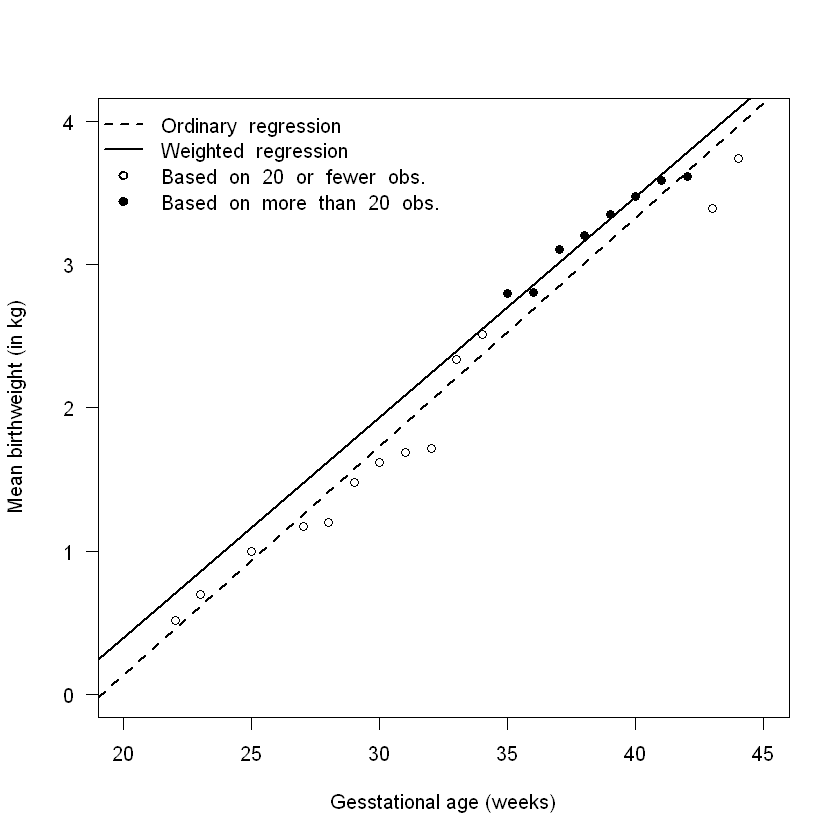

In [220]:
plot(Weight ~ Age, data = gestation, type = "n",    # type = "n": khong ve cac diem tren bieu do
     las = 1, xlim = c(20,45), ylim = c(0,4),
     xlab = "Gesstational age (weeks)",
     ylab = "Mean birthweight (in kg)")

points(Weight[Births<20] ~ Age[Births<20], pch = 1, data = gestation)    # ve diem tren bieu do sao cho Births < 20
points(Weight[Births>=20] ~ Age[Births>=20], pch = 19, data = gestation) # ve diem tren bieu do sao cho Births >= 20
abline( coef(gest.ord), lty = 2, lwd = 2)           # lty: line type; lwd: line width
abline( coef(gest.wtd), lty = 1, lwd = 2)

legend("topleft", lwd = c(2,2), bty = "n",          # bty = "n": no box (khong ve vien legend)
       lty = c(2,1,NA,NA), pch = c(NA,NA,1,19),
       legend = c("Ordinary  regression", "Weighted  regression",
                  "Based  on  20  or  fewer  obs.", "Based  on  more  than  20  obs."))

**Xét dữ liệu lungcap**

In [221]:
LC.m1 <- lm(log(lungcap$FEV) ~ Age + Ht + Gender + Smoke, data = lungcap)
names(LC.m1)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "contrasts"     "xlevels"       "call"          "terms"        
[13] "model"

Ta có thể truy cập các giá trị ước lượng của mô hình bằng cách gọi tên 1 cột

In [222]:
LC.m1$coefficients

(Intercept)         Age          Ht     GenderM SmokeSmoker 
-1.94399818  0.02338721  0.04279579  0.02931936 -0.04606754

In [223]:
LC.m1$residuals

1             2             3             4             5 
-0.0252436958 -0.3792931228 -0.1066218396  0.1248355135  0.2089799687 
            6             7             8             9            10 
 0.1027030888  0.1610983455  0.0160405748  0.0665406834 -0.0215101947 
           11            12            13            14            15 
-0.0178214246 -0.1764497239 -0.2247164649  0.1184055127  0.1774552972 
           16            17            18            19            20 
 0.1075817564  0.0791567239  0.0308627146 -0.6327762314 -0.1917847466 
           21            22            23            24            25 
-0.0443660764  0.0138071902  0.0417717289 -0.1091322778 -0.1268002165 
           26            27            28            29            30 
 0.0067509256  0.1657054577  0.0772408034  0.0631808178  0.0067228026 
           31            32            33            34            35 
-0.0212315148  0.0354684688 -0.1215631200  0.1713978769 -0.2457597589 
           36            37            38            39            40 
-0.0266766510  0.0695793147  0.0519174146 -0.0791901050  0.1631835152 
           41            42            43            44            45 
 0.1936160840  0.0579174557 -0.1621575003  0.0730844435 -0.1515637932 
           46            47            48            49            50 
-0.0059563970 -0.0097585296 -0.0226317325  0.0505924570 -0.0138649270 
           51            52            53            54            55 
-0.2586699751 -0.0787844731 -0.1056852858  0.2684331977 -0.0907097280 
           56            57            58            59            60 
 0.0880894760  0.0804812605 -0.2569460861  0.0581282561  0.0136764935 
           61            62            63            64            65 
-0.0511066178  0.1593326836  0.2397004572 -0.1682320980  0.0958945717 
           66            67            68            69            70 
-0.2122891565  0.0956962374 -0.1942282142 -0.0978430731 -0.0340542342 
           71            72            73            74            75 
-0.3721303204 -0.0491244872  0.0315854432 -0.0244215034  0.1646954862 
           76            77            78            79            80 
-0.1744063134 -0.0032382059  0.2033591858  0.1046057081 -0.0558886439 
           81            82            83            84            85 
-0.0600272267  0.0386172791 -0.1700398260 -0.3045347645  0.0089775798 
           86            87            88            89            90 
-0.2391890985 -0.0095844381  0.0799608063  0.1809510782 -0.0263094269 
           91            92            93            94            95 
 0.2810764267  0.1723545634  0.0978148309 -0.0155944703  0.0596093217 
           96            97            98            99           100 
-0.0837814750  0.0341626561  0.0183334202 -0.0052025978  0.0457053484 
          101           102           103           104           105 
 0.0041711393 -0.0473624838 -0.0925098156 -0.0284979808  0.0787432168 
          106           107           108           109           110 
-0.1765609976  0.1570419881 -0.0325898859 -0.0018259721 -0.1683472478 
          111           112           113           114           115 
-0.5871681190  0.0712967707 -0.0285927475 -0.0181590998 -0.1705236253 
          116           117           118           119           120 
 0.0245962446  0.1357204650 -0.2414839713 -0.2534979997  0.0456375334 
          121           122           123           124           125 
-0.0895693095  0.0448818333 -0.0323979837 -0.0353163190  0.1363856690 
          126           127           128           129           130 
-0.1139124990 -0.1432884840  0.0270053665 -0.0325943058  0.1759612295 
          131           132           133           134           135 
-0.1705157178 -0.0922967429  0.3083950864  0.2134357223  0.0638926736 
          136           137           138           139           140 
 0.0843752763  0.0898291270  0.0967977963  0.0243502425  0.1301196431 
          141           142         

Hoặc xem tổng hợp các giá trị cơ bản của mô hình ước lượng

In [224]:
summary(LC.m1)


Call:
lm(formula = log(lungcap$FEV) ~ Age + Ht + Gender + Smoke, data = lungcap)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63278 -0.08657  0.01146  0.09540  0.40701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.943998   0.078639 -24.721  < 2e-16 ***
Age          0.023387   0.003348   6.984  7.1e-12 ***
Ht           0.042796   0.001679  25.489  < 2e-16 ***
GenderM      0.029319   0.011719   2.502   0.0126 *  
SmokeSmoker -0.046068   0.020910  -2.203   0.0279 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1455 on 649 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8095 
F-statistic: 694.6 on 4 and 649 DF,  p-value: < 2.2e-16


Hoặc sử dụng các hàm tổng quát trong R

In [225]:
coef(LC.m1)

(Intercept)         Age          Ht     GenderM SmokeSmoker 
-1.94399818  0.02338721  0.04279579  0.02931936 -0.04606754

In [226]:
summary(LC.m1)$sigma

[1] 0.1454686

## Đọc hiểu Hệ số hồi quy

**Xét dữ liệu gestation** <br>
Mô hình hồi quy:
<center>$\begin{cases}
    var[y]=0.6010/w_i\\
    \stackrel\frown{\mu}=-2.678+0.1538x
  \end{cases}$</center>
Trong đó $w_i$ là trọng số (Births), $\stackrel\frown{\mu}=E[y]$ với y là trung bình cân nặng và $x$ là số tuần tuổi <br>
<br>
Thành phần hệ thống của mô hình chỉ ra rằng, với mỗi tuần tuổi tăng lên, trung bình cân nặng của các em bé tăng thêm xấp xỉ 0.1538kg <br>
Thành phần ngẫu nhiên của mô hình chỉ ra rằng, phương sai của cân nặng thực tế so với cân nặng ước lượng là $s^2=0.6010$ <br>

**Xét dữ liệu lungcap** <br>
Mô hình hồi quy: <br>
<center>$\begin{cases}
    var[log(FEV)]=0.02116\\
    \stackrel\frown{\mu}=E[log(FEV)]=-1.944+0.02339x_1+0.04280x_2+0.02932x_3-0.04607x_4
  \end{cases}$</center>
Trong đó $x_1$ là tuổi, $x_2$ là chiều cao, $x_3$ là biến giả chiều cao, $x_4$ là biến giả hút thuốc <br>
<br>
Cách đọc hiểu mô hình sẽ khác đi vì biến đầu ra của mô hình là $log(FEV)$. Ví dụ, nếu $x_2$ (Ht) tăng thêm 1 đơn vị thì trung bình FEV tăng lên $\exp(0.04280)=1.044$ giả định rằng tất cả các biến khác là cố định <br>
Thành phần ngẫu nhiên của mô hình chỉ ra rằng, phương sai của log(FEV) thực tế so với cân nặng ước lượng được xem là không đổi ở mức 0.02116

## Kiểm định mô hình hồi quy tuyến tính: $t$-Tests
### Mô hình hồi quy tuyến tính phân phối chuẩn
Biến đầu ra từ đầu bài đến giờ không được giả định phân phối, chỉ có 2 giả định sau: <br>
- Độc lập <br>
- Phương sai không đổi <br>
Tuy nhiên để hiểu rõ hơn về thành phần ngẫu nhiên của mô hình, chúng ta cần giả định quy luật phân phối của biến đầu ra. Phân phối chuẩn thường được sử dụng <br>
Mô hình hồi quy tuyến tính phân phối chuẩn: <br>
<center>$\begin{cases}
    y_i\sim N(\mu_i,\sigma^2/w_i)\\
    \mu_i=\beta_0+\displaystyle\sum_{j=1}^{p} \beta_jx_{ji}
  \end{cases}$</center>

### Phân phối của hệ số $\stackrel\frown{\beta_j}$
Ghi nhớ: Khi $y_i$ phân phối chuẩn thì các hệ số $\stackrel\frown{\beta_j}$ cũng phân phối chuẩn với mô hình phân phối sau: <br>
<center>$\stackrel\frown{\beta_j}\sim N(\beta_j,var[\stackrel\frown{\beta_j}])$</center>
Khi $\sigma^2$ đã biết thì <br>
<center>$Z=\cfrac{\stackrel\frown{\beta_j}-\beta_j}{se(\stackrel\frown{\beta_j})}$</center>
có phân phối chuẩn tắc <br>
Khi $\sigma^2$ chưa biết thì <br>
<center>$T=\cfrac{\stackrel\frown{\beta_j}-\beta_j}{se(\stackrel\frown{\beta_j})}$</center>
có phân phối Student $t$ với bậc tự do bằng $n-p'$. Lưu ý rằng phân phối Student $t$ hội tụ về chuẩn tắc khi n đủ lớn

### Kiểm định cho $\beta_j$
Ta có giả thiết: <br>
<center>$H_0:\beta_j=\beta_j^0 \quad ; \quad  H_A:\beta_j\neq\beta_j^0$</center>
Trong đó $\beta_j^0$ là một giá trị cụ thể (thường xét $\beta_j^0$ = 0) <br>
Thống kê: <br>
<center>$T=\cfrac{\stackrel\frown{\beta_j}-\beta_j}{se(\stackrel\frown{\beta_j})}$</center>
được sử dụng để kiểm định giả thiết <br>
<br>
Kiểm định $t$-test kiểm tra rằng liệu $\beta_j\neq\beta_j^0$ có ý nghĩa thống kê hay không trong mô hình hiện tại (mô hình các biến đầu vào đang được ước lượng)<br>

In [227]:
summary(LC.m1)


Call:
lm(formula = log(lungcap$FEV) ~ Age + Ht + Gender + Smoke, data = lungcap)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63278 -0.08657  0.01146  0.09540  0.40701 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.943998   0.078639 -24.721  < 2e-16 ***
Age          0.023387   0.003348   6.984  7.1e-12 ***
Ht           0.042796   0.001679  25.489  < 2e-16 ***
GenderM      0.029319   0.011719   2.502   0.0126 *  
SmokeSmoker -0.046068   0.020910  -2.203   0.0279 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1455 on 649 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8095 
F-statistic: 694.6 on 4 and 649 DF,  p-value: < 2.2e-16


- Cột **estimate**: giá trị ước lượng với từng hệ số <br>
- Cột **Std.Error**: giá trị độ lệch chuẩn tương ứng với từng hệ số <br>
- Cột **t value**: giá trị thống kê $t$ để kiểm định giả thiết $H_0: \beta_j=0$ <br>
- Cột **Pr(>|t|)**: giá trị p-value cho kiểm định 2 phía (kiểm định $\beta_j\neq\beta_j^0$) <br>

In [228]:
round(coef(summary(LC.m1)),5)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.94400,0.07864,-24.72067,0.00000
Age,0.02339,0.00335,6.98449,0.00000
Ht,0.04280,0.00168,25.48933,0.00000
GenderM,0.02932,0.01172,2.50196,0.01260
SmokeSmoker,-0.04607,0.02091,-2.20311,0.02794


**Ví dụ:** kiểm định cho giả thiết $H_0:\beta_4=0$ và $H_A:\beta_4\neq0$ (hệ số $\beta_4$ của biến giả Smoke) <br>
Giá trị $t=-2.20311$ và $p-value=0.02794$ tương ứng với hệ số $\beta_4$ cho thấy trạng thái hút thuốc có ý nghĩa thống kê khi mô hình bao gồm các biến đầu vào: Age, Ht và Gender. Khi mô hình bao gồm các biến đầu vào khác thì giá trị $t$ và $p-value$ cũng sẽ thay đổi

### Ước lượng khoảng cho $\beta_j$
Công thức khoảng tin cậy cho $\beta_j$: <br>
<center>$\stackrel\frown{\beta_j}\pm t_{\alpha/2,n-p'}^*se(\stackrel\frown{\beta_j})$</center>
Khoảng tin cậy cho các hệ số được xác định bởi hàm $confint()$ trong R

In [229]:
confint(LC.m1)

,2.5 %,97.5 %
(Intercept),-2.098414941,-1.789581413
Age,0.016812109,0.029962319
Ht,0.039498923,0.046092655
GenderM,0.006308481,0.052330236
SmokeSmoker,-0.087127344,-0.005007728


In [230]:
confint(LC.m1, level = 0.9)

,5 %,95 %
(Intercept),-2.07353203,-1.81446432
Age,0.01787163,0.02890280
Ht,0.04003018,0.04556139
GenderM,0.01001648,0.04862224
SmokeSmoker,-0.08051092,-0.01162416


### Ước lượng khoảng cho $\mu$
Công thức khoảng tin cậy cho $\mu$: <br>
<center>$\stackrel\frown{\mu_g}\pm t_{\alpha/2,n-p'}^*se(\stackrel\frown{\mu_g})$</center>
Các bước xác định khoảng tin cậy cho $\mu$ trên R

In [231]:
new.df <- data.frame(Age = 18, Ht = 66, Gender = "F", Smoke = "Smoker")
out <- predict(LC.m1, newdata = new.df, se.fit = TRUE)    # se.fit: do lech chuan cua fitted value
names(out)

[1] "fit"            "se.fit"         "df"             "residual.scale"

In [232]:
out$se.fit

[1] 0.02350644

In [233]:
tstar <- qt(df = LC.m1$df,p = 0.975)   # Do tin cay 95%
ci.lo <- out$fit - tstar*out$se.fit
ci.hi <- out$fit + tstar*out$se.fit
CIinfo <- cbind(Lower = ci.lo, Estimate = out$fit, Upper = ci.hi)
CIinfo

Lower,Estimate,Upper
1.209268,1.255426,1.301584


Bảng trên cho thấy ước lượng khoảng của log(FEV), ta có thể quy ra ước lượng khoảng của FEV như sau

In [234]:
exp(CIinfo)

Lower,Estimate,Upper
3.351032,3.509334,3.675114


Chúng ta có thể tạo 1 bảng ước lượng khoảng cho $\mu$ cho các đối tượng quan sát là nữ, 18 tuổi có hút thuốc và chiều cao là bất kỳ

In [235]:
newHt <- seq(min(lungcap$Ht), max(lungcap$Ht), by = 2)   #tao mang du lieu
newlogFEV <- predict(LC.m1, se.fit = TRUE,
                     newdata = data.frame(Age = 18, Ht=newHt, Gender = "F", Smoke = "Smoker"))   # du bao gia tri trung binh
ci.lo <- exp(newlogFEV$fit - tstar*newlogFEV$se.fit)
ci.hi <- exp(newlogFEV$fit + tstar*newlogFEV$se.fit)
cbind(ht = newHt, FEVhat = exp(newlogFEV$fit), SE = newlogFEV$se.fit,
      Lower = ci.lo, Upper = ci.hi, CI.Width = ci.hi - ci.lo)

ht,FEVhat,SE,Lower,Upper,CI.Width
46,1.491095,0.04886534,1.354669,1.641259,0.2865900
48,1.624341,0.04585644,1.484469,1.777392,0.2929226
50,1.769494,0.04289937,1.626540,1.925011,0.2984711
52,1.927618,0.04000563,1.781987,2.085151,0.3031639
54,2.099873,0.03719000,1.951990,2.258959,0.3069685
56,2.287520,0.03447163,2.137804,2.447722,0.3099183
58,2.491936,0.03187542,2.340743,2.652894,0.3121513
60,2.714619,0.02943370,2.562170,2.876138,0.3139672
62,2.957201,0.02718813,2.803464,3.119368,0.3159041
64,3.221460,0.02519123,3.065984,3.384820,0.3188364


## Phân tích phương sai
Giá trị dự đoán của mô hình hồi quy tuyến tính được xác định bởi công thức: <br>
<center>$\stackrel\frown{\mu}_i=\stackrel\frown{\beta}_0+\displaystyle\sum_{j=1}^{p} \stackrel\frown{\beta}_jx_{ji}$</center>
Ta có: <br>
<center>$y_i=\stackrel\frown{\mu}_i+(y_i-\stackrel\frown{\mu}_i)$</center>
Nói cách khác: Dữ liệu quan sát = giá trị dự đoán + phần dư <br>
Suy ra : <br>
<center>$y_i-\bar{y}_w=(\stackrel\frown{\mu}_i-\bar{y}_w)+(y_i-\stackrel\frown{\mu}_i)$</center>
<br>
Trong đó $\bar{y}_w$ là giá trị trung bình có trọng số của $y_i$ ($\bar{y}_w=\sum_{i=1}^{n} w_iy_i/\sum_{i=1}^{n} w_i$)

Quy ước: <br>
- $SST=\sum_{i=1}^{n} w_i(y_i-\bar{y}_w)^2$: Tổng phương sai (total sum of square)
- $SSReg=\sum_{i=1}^{n} w_i(\stackrel\frown{\mu}_i-\bar{y}_w)^2$: Phương sai giá trị dự đoán (regression sum of square)
- $RSS=\sum_{i=1}^{n} w_i(y_i-\stackrel\frown{\mu}_i)^2$: Phương sai phần dư (residual sum of square)
<br>
Suy ra: <br>
<center>$SST=SSReg+RSS$</center>
(do $\sum_{i=1}^{n} (\stackrel\frown{\mu}_i-\bar{y}_w)(y_i-\stackrel\frown{\mu}_i)=0$)

Phương trình trên cho thấy: phương sai của biến đầu ra = phương sai giá trị dự đoán + phương sai phần dư <br>
- Thành phần hệ thống: Phương sai giá trị dự đoán
- Thành phần ngẫu nhiên: Phương sai phần dư

Phân tích phương sai cho chúng ta hiểu biết về nguồn gốc của tổng phương sai (từ thành phần hệ thống hay từ thành phần ngẫu nhiên)

**Kiểm định sự ảnh hưởng của biến đầu vào tới biến đầu ra** <br>
Giả thiết không: $H_0:\beta_j=0$ cho tất cả các biến đầu vào $j=0,...,p$ <br>
- $RSS/\sigma^2$ có phân phối chi-square với $n-p'$ bậc tự do
- $SSReg/\sigma^2$ có phân phối chi-square với $p'-1$ bậc tự do 
<center>$F=\cfrac{SSReg/(p'-1)}{RSS/(n-p')}=\cfrac{MSReg}{MSE}$</center>

Trong đó: <br>
- Phân phối F có $(p'-1,n-p')$ bậc tự do
- $MSE$: trung bình phương sai không chệch của phần dư
- $MSReg$: trung bình phương sai không chệch của hệ số ước lượng 

Bảng phân tích phương sai cho mô hình hồi quy tuyến tính
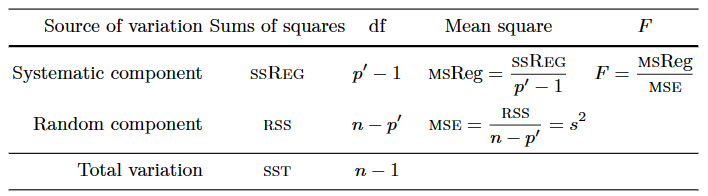

Giá trị F lớn thể hiện phương sai từ thành phần hệ thống (phương sai các hệ số ước lượng) là lớn hơn tương đối so với phương sai từ phần dư và ngược lại

In [237]:
summary(LC.m1)$fstatistic

value    numdf    dendf 
694.5804   4.0000 649.0000

**Hệ số xác định $R^2$** thể hiện tỷ lệ giữa phương sai hệ số ước lượng và tổng phương sai <br>
<center>$R^2=\cfrac{SSReg}{SST}=1-\cfrac{RSS}{SST}$</center>
Ta thấy $R^2\in[0,1]$ <br>
$R^2$ còn được gọi là multiple-$R^2$ vì $R^2$ cũng chính là hệ số tương quan Pearson giữa $y_i$ và $\stackrel\frown{\mu}_i$

Nhận thấy rằng khi tăng số lượng biến đầu vào không làm thay đổi $RSS$ tuy nhiên hệ số xác định $R^2$ sẽ tăng lên mặc dù các biến đầu vào có thể không làm tăng độ chính xác của mô hình hồi quy<br>
Vì lý do trên, ta sử dụng hệ số xác định điều chỉnh $\bar{R}^2$ (điều chỉnh để không phụ thuộc vào bậc tự do)

<center>$\bar{R}^2=1-\cfrac{RSS/(n-p')}{SST/(n-1)}=1-(1-R^2)\cfrac{n-1}{n-p'}$</center>

$\bar{R}^2$ có thể là số âm, xảy ra khi $MSReg<MSE$ biểu thị rằng mô hình không có ý nghĩa

## So sánh các mô hình lồng nhau
### Phân tích phương sai khi so sánh mô hình lồng nhau
Mô hình A được gọi là lồng trong mô hình B khi tất cả các biến đầu ra của mô hình A đều nằm trong mô hình B <br>
Ví dụ:

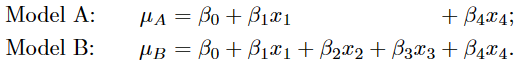

Nhiệm vụ: cần xác định mô hình B (phức tạp hơn) có ý nghĩa hơn mô hình A hay không <br>
Ta thấy khi so sánh mô hình A và mô hình B, hệ số $\beta_2$ và $\beta_3$ trong mô hình A bằng 0 <br>
Ta có giả thiết $H_0:\beta_2=\beta_3=0$ và giả thiết $H_1:\beta_0$ và $\beta_1$ không đồng thời bằng 0 <br>
Xét 2 mô hình sau:

In [ ]:
LC.A <- lm(log(FEV) ~ Age               + Smoke, data = lungcap)
LC.B <- lm(log(FEV) ~ Age + Ht + Gender + Smoke, data = lungcap)

In [ ]:
RSS.A <- sum(resid(LC.A)^2)    # resid() tinh phan du
RSS.B <- sum(resid(LC.B)^2)
c(ModelA = RSS.A, ModelB = RSS.B)

Hiệu RSS của mô hình A và mô hình B được gọi là **tổng bình phương** (Sum of square - SS)

In [ ]:
SS <- RSS.A - RSS.B; SS

In [ ]:
DF <- df.residual(LC.A) - df.residual(LC.B); DF

Giá trị SS thể hiện sự thay đổi (giảm xuống) của phương sai phần dư khi sử dụng mô hình A thay vì mô hình B. Tuy nhiên ta nhận thấy có sự giảm xuống của bậc tự do ở mô hình B sang mô hình A<br>
Phương pháp kiểm định giả thiết tốt hơn là so sánh SS/(hiệu bậc tự do) và (RSS của mô hình B)/(số bậc tự do của mô hình B)

In [ ]:
df.B <-df.residual(LC.B); df.B

In [ ]:
Fstat <- (SS/DF)/(RSS.B/df.B); Fstat

p-value của phân phối F với bậc tự do (2,649)

In [ ]:
pf(Fstat, df1 = DF, df2=df.B, lower.tail = FALSE)

Giá trị p-value gần bằng 0 chứng tỏ rằng giả thiết Mô hình B khác Mô hình A là có ý nghĩa thống kê. Trong R, ta có thể sử dụng hàm $anova()$

In [ ]:
anova(LC.A, LC.B)

### Phân tích phương sai tuần tự
Phân tích phương sai tuần tự thường xuyên được sử dụng 

In [ ]:
LC.0 <- lm(log(FEV) ~ 1, data = lungcap) # khong co ben dau vao
LC.1 <- update(LC.0, . ~ . + Age)        # chi co Age la bien dau vao
LC.2 <- update(LC.1, . ~ . + Ht)         # them Ht la bien dau vao
LC.3 <- update(LC.2, . ~ . + Gender)
LC.4 <- update(LC.3, . ~ . + Smoke)

Tính toán RSS

In [ ]:
RSS.0 <- sum(resid(LC.0)^2)
RSS.1 <- sum(resid(LC.1)^2)
RSS.2 <- sum(resid(LC.2)^2)
RSS.3 <- sum(resid(LC.3)^2)
RSS.4 <- sum(resid(LC.4)^2)
RSS.list <- c(Model4 = RSS.4, Model3 = RSS.3, Model2 = RSS.2, Model1 = RSS.1, Model0 = RSS.0)
RSS.list

Ta nhận thấy rằng mô hình càng phức tạp thì RSS càng nhỏ

In [ ]:
SS.list <- diff(RSS.list); SS.list

Bậc tự do chênh lệch 1 đơn vị khi chuyển giữa 2 mô hình liền kề. Chúng ta tính toán RSS để xác định được $\sigma^2=MSE$, sử dụng phân phối F

In [ ]:
s2 <- summary(LC.4)$sigma^2         # xac dinh MSE
F.list <- (SS.list/1)/s2; F.list    # tinh F

In [ ]:
P.list <- pf(F.list, 1, df.residual(LC.4), lower.tail = FALSE)
round(P.list, 6)

Các kết quả trên có thể đạt được bằng hàm anova() tron R

In [ ]:
anova(LC.4)

Khi xét đến biến Smoke, chúng ta đang xét đến ảnh hưởng của biến Smoke khi các biến còn lại cũng ở trong mô hình. Nói cách khác, $F$-test cho biến Smoke được điều chỉnh bởi các biến Age, Ht, Gender. Nói chung, các kiểm định $F$-test tuần tự trong ANOVA luôn được điều chỉnh bởi các biến hiện có trong mô hình <br>
Bởi vì $F$-test được điều chỉnh bởi các biến khác trong mô hình, nên có rất nhiều trường hợp mà $F$-test có thể được xem xét khi xác định ảnh hưởng của biến Smoke. Một số ví dụ: <br>
- Kiểm định cho biến Smoke mà không điều chỉnh với biến nào khác
- Kiểm định cho Smoke với điều chỉnh của biến Age
- Kiểm định cho Smoke với điều chỉnh của biến Ht
- Kiểm định cho Smoke với điều chỉnh của 2 biến Age và Gender

Thứ tự trong mô hình của 1 biến cần kiểm định là quan trọng trong kiểm định $F$-test <br>
Trái lại, trong kiểm định $t$-test, thứ tự của biến trong mô hình là không quan trọng <br>
Bảng ANOVA hiển thị kết quả kiểm định $F$-test theo thứ tự cho trước. Mô hình ở hàng trên là mô hình lồng trong mô hình hàng dưới. Thứ tự của các biến là quan trọng <br>
Xét mô hình LC.4.new với thứ tự các biến thay đổi so với mô hình LC.4

In [ ]:
LC.4.rev <- lm(log(FEV) ~ Smoke + Gender + Ht + Age, data = lungcap)
anova(LC.4.rev)

Mức độ ý nghĩa của biến Smoke tùy thuộc vào vị trí của biến trong mô hình khi kiểm định dùng ANOVA

### Hồi quy song song và hồi quy độc lập
Xem xét ý nghĩa thống kê khi kết hợp biến định tính trong các cặp mô hình lồng nhau <br>
Trường hợp ví dụ: data lungcap, sử dụng biến chiều cao (Ht) và trạng thái hút thuốc (Smoke) <br>
Mô hình thu được với cặp biến trên: <br>
<center>$\stackrel\frown{\mu}=-2.277+0.05222x_2-0.006830x_4$</center>
với RSS = 14.82 và bậc tự do = 651 


In [ ]:
mod.1 <- lm(log(FEV) ~ Ht + Smoke, data = lungcap)
summary(mod.1)

$x_4=0$ đối với người hút thuốc, $x_4=1$ đối với người không hút thuốc, thay vào mô hình ta có <br>
<center>$\stackrel\frown{\mu}=\begin{cases}
    -2.277+0.05222x_2 \quad (x_4=0)\\
    -2.284+0.05222x_2 \quad (x_4=1)
  \end{cases}$</center>

Mô hình trên có 2 đường thẳng với hệ số của biến $x_2$ và thành phần ngẫu nhiên $\sigma^2$ hoàn toàn giống nhau chỉ khác hệ số chặn, mô hình trên được gọi là **Hồi quy song song** <br>
Nhìn lại ma trận hệ số ước lượng của mô hình trên, ta thấy biến Smoke không có ý nghĩa thống kê

Để thay đổi cả hệ số biến $x_2$ và hệ số chặn của mô hình trên, ta có thể thêm 1 biến tương tác giữa chiều cao và trạng thái hút thuốc <br>
Ta có mô hình: <br>
<center>$\stackrel\frown{\mu}=-2.281+0.05230x_2-0.002294x_4+0.002294x_2x_4$</center>

In [ ]:
LC.model <- lm(log(FEV) ~ Ht + Smoke + Ht:Smoke, data = lungcap)
summary(LC.model)

$x_4=0$ đối với người hút thuốc, $x_4=1$ đối với người không hút thuốc, thay vào mô hình ta có <br>
<center>$\stackrel\frown{\mu}=\begin{cases}
    -2.281+0.05230x_2 \quad (x_4=0)\\
    -2.137+0.05000x_2 \quad (x_4=1)
  \end{cases}$</center>

Mô hình trên không được coi là 2 mô hình hồi quy độc lập vì cả 2 mô hình có chung thành phần ngẫu nhiên $\sigma^2$ <br>
Kiểm định cho các hệ số $\beta_j$ để xác định mức ý nghĩa thống kê. Ta thấy biến Smoke và biến tương tác giữa Ht và Smoke không có ý nghĩa thống kê. Quy trình trên cho ta thấy được biến Ht có ý nghĩa  thống kê đến log(FEV) hơn biến Smoke

In [ ]:
anova(LC.model)

### Quy tắc cận biên
- Nếu trong mô hình có biến định lượng bậc cao, thì mô hình cũng nên có biến định lượng đó bậc thấp hơn (ví dụ nếu mô hình có biến $x^2$ thì mô hình cũng nên có $x$)
- Nếu mô hình có biến tương tác của các biến định tính thì mô hình cũng nên có các biến riêng lẻ tương ứng với biến tương tác đó và các biến tương tác bậc thấp hơn (ví dụ mô hình có biến tương tác A.B.C thì mô hình nên có các biến A, B, C, A.B, A.C, B.C)
- Nếu mô hình có biến tương tác của cả biến định tính và biến định lượng thì mô hình cũng nên có các biến riêng lẻ tương ứng với biến tương tác đó

## Lựa chọn giữa các mô hình không lồng nhau
2 tiêu chuẩn lựa chọn mô hình: chính xác hơn và tiết kiệm hơn <br>
Xác định độ chính xác bằng $RSS$ (RSS càng nhỏ càng tốt). RSS gần như luôn giảm khi thêm một biến mới vào mô hình. Thêm nhiều biến mới có thể tăng độ chính xác nhưng cũng tăng độ phức tạp của mô hình <br>
Chỉ số AIC cân bằng giữa 2 tiêu chuẩn trên bằng cách đo lường độ chính xác bằng $RSS$ nhưng đồng thời trừ đi số lượng hệ số cần ước lượng trong mô hình (khi phương sai $\sigma^2$ là chưa biết)<br>
<center>$AIC=nlog(RSS/n)+2p'$</center>

AIC càng nhỏ càng tốt (tiến về $-\infty$)

Một chỉ số khác được sử dụng (khi phương sai $\sigma^2$ là chưa biết): <br>
<center>$BIC=nlog(RSS/n)+p'log(n)$</center>

BIC lựa chọn mô hình có tính tiết kiệm cao hơn (vì $log(n)>2$ với n > 8) <br>
AIC và BIC được sử dụng cho các mục tiêu khác nhau: <br>
- AIC được sử dụng nhiều khi cần mô hình có thể dự đoán tốt hơn
- BIC được sử dụng nhiều khi cần nhiều bằng chứng hơn để thêm một biến mới vào mô hình

Cả AIC và BIC đều được tính toán khi sử dụng câu lệnh $extractAIC()$ trong R <br>
Ví dụ với dữ liệu lungcap, so sánh 2 mô hình sau

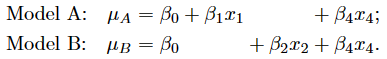

In [ ]:
LC.A <- lm(log(FEV) ~ Age + Smoke, data = lungcap)
extractAIC(LC.A)

In [ ]:
LC.B <- lm(log(FEV) ~ Ht + Smoke, data = lungcap)
extractAIC(LC.B)

Vì AIC của mô hình B là thấp hơn nên mô hình B tốt hơn theo chỉ tiêu AIC (chỉ tiêu đầu tiên là số hệ số được ước lượng trong mô hình)

In [ ]:
k <- log(length(lungcap$FEV))
extractAIC(LC.A, k = k)

In [ ]:
extractAIC(LC.B, k = k)

BIC của mô hình B thấp hơn nên mô hình B tốt hơn theo chỉ tiêu BIC. Vậy cả AIC và BIC đều chỉ ra rằng, sử dụng biến Ht và Smoke hiệu quả hơn sử dụng biến Age và Smoke

## Công cụ điều chỉnh mô hình
### Thêm hoặc bớt biến đầu vào
R có hàm hỗ trợ việc kiểm tra bỏ biến lần lượt $add1()$ hoặc thêm biến lần lượt $drop1()$ <br>
Xét dữ liệu lungcap

In [ ]:
drop1(lm(log(FEV) ~ Age + Ht + Gender + Smoke, data = lungcap), test = "F")  # tra them ket qua F-test

Ta thấy nếu không bỏ đi biến nào thì AIC nhỏ nhất (mô hình tốt nhất)

In [ ]:
LC.full <- lm(log(FEV) ~ Age + Ht + Gender + Smoke, data = lungcap)
add1(lm(log(FEV) ~ Smoke, data = lungcap), LC.full, test = "F")  # tra them ket qua F-test

Từ mô hình đơn giản $log(FEV)\sim Smoke$, thêm lần lượt các biến khác vào mô hình. Ta thấy thêm bất cứ biến nào cũng khiến mô hình có AIC tốt hơn. Vì Ht có AIC tốt nhất nên chúng ta thêm Ht vào mô hình và tiếp tục kiểm tra

### Phương pháp tự động chọn mô hình
3 phương pháp tự động lựa chọn mô hình phổ biến nhất: hồi quy lùi, hồi quy tiến và hồi quy từng bước 

**Hồi quy tiến**
- Bắt đầu với một số biến cơ bản (thường chỉ là hằng số $\beta_0$)
- Thêm lần lượt các biến chưa ở trong mô hình vào mô hình, tính toán AIC (BIC)
- Biến nào khiến AIC (BIC) nhỏ nhất, thêm biến đó vào mô hình và lặp lại với các biến chưa ở trong mô hình

**Hồi quy lùi** ngược lại với hồi quy tiến
- Bắt đầu với tất cả biến
- Bỏ lần lượt các biến ở trong mô hình vào mô hình, tính toán AIC (BIC)
- Biến nào khiến AIC (BIC) nhỏ nhất, bỏ biến đó khỏi mô hình và lặp lại với các biến còn ở trong mô hình

**Hồi quy từng bước** <br>
- Đối với biến chưa ở trong mô hình, thêm mỗi lần 1 biến; đối với biến đã ở trong mô hình, bỏ mỗi lần 1 biến (tức là vừa thêm biến vừa bỏ biến) và tính toán AIC (BIC)
- Lựa chọn mô hình có AIC (BIC) nhỏ nhất. Các biến tương tác có thể được tính đến trong mô hình nếu mô hình đã có các biến đơn lẻ tương ứng

Xét dữ liệu lungcap

In [ ]:
min.model <- lm(log(FEV) ~ Age + Ht + Gender + Smoke, data = lungcap)
max.model <- lm(log(FEV) ~ (Age + Ht + Gender + Smoke)^2, data = lungcap)

auto.forward <- step(min.model, direction = "forward",
                    scope = list(lower = min.model, upper = max.model))
auto.backward <- step(max.model, direction = "backward",
                    scope = list(lower = min.model, upper = max.model))
auto.both <- step(min.model, direction = "both",
                    scope = list(lower = min.model, upper = max.model))

In [ ]:
signif(coef(auto.forward), 3)
signif(coef(auto.backward), 3)
signif(coef(auto.both), 3)

Mô hình được lựa chọn có thể không phù hợp và 3 phương pháp không đồng thời gợi ý cùng một mô hình

### Cẩn trọng khi sử dụng phương pháp tự động
- Các phương pháp tự động không sử dụng các hiểu biết về dữ liệu
- Phương pháp tính không được kiểm định
- Các phương pháp kiểm định thống kê cho các tham số không được sử dụng

# Case study
data: dental <br>
- Country: tên nước
- Indus: đất nước phát triển hoặc đang phát triển
- Sugar: trung bình lượng đường tiêu thụ (kg)
- DMFT: số răng sâu, rụng ở trẻ 12 tuổi

In [ ]:
data(dental); summary(dental)

In [ ]:
head(dental$Non)

Biểu đồ số lượng trung bình các răng sâu, rụng theo lượng đường tiêu thụ trung bình của các nước

In [ ]:
plot(DMFT ~Sugar, las = 1, data = dental, pch = ifelse(Indus == "Ind", 19, 1),
     xlab = "Mean annual sugar consumption\n(kg/person/year)",
     ylab = "Mean DMFT at age 12")
legend("topleft", pch = c(19,1), legend = c("Indus", "Non-indus"))

Biểu đồ thể hiện sự khác nhau của số lượng trung bình các răng sâu, rụng theo kiểu hình phát triển/đang phát triển

In [ ]:
boxplot(DMFT ~ Indus, data = dental, las = 1,
        ylab = "Mean DMFT at age 12",
        xlab = "Type of country")

In [ ]:
lm.dental <- lm(DMFT ~ Sugar*Indus, data = dental)
anova(lm.dental)

Trong bảng ANOVA, biến Sugar có ý nghĩa thống kê và không bị điều chỉnh bởi các biến khác <br>
Biến Indus không có ý nghĩa thống kê sau khi bị điều chỉnh bởi Sugar <br>
Biến tương tác Sugar:Indus có ý nghĩa thống kê sau khi đã điều chỉnh bởi Sugar and Indus <br>
(trong kiểm định F thứ tự của các biến đầu vào ảnh hưởng đến kết quả kiểm định)

In [ ]:
coef(summary(lm.dental))

Kết quả này cho thấy, trong trường hợp Indus=="Ind" (biến giả NonIndus = 0), biến Sugar không còn ý nghĩa thống kê. Thêm vào đó, hệ số của biến Sugar là âm, có nghĩa là tiêu thụ nhiều đường hơn khiến ít răng bị sâu hơn (mặc dù không có ý nghĩa thống kê) <br>
(Trong kiểm định t, thứ tự của các biến đầu vào không ảnh hưởng đến kết quả kiểm định hệ số)

In [ ]:
contrasts(dental$Indus)

In [ ]:
sum(coef(lm.dental) [c(2,4)])

Đối với nước đang phát triển, hệ số của lượng đường tiêu thụ là số dương. Vẽ biểu đồ mô hình ước lượng để thấy rõ hơn

In [ ]:
plot(DMFT ~Sugar, las = 1, data = dental, pch = ifelse(Indus == "Ind", 19, 1),
     xlab = "Mean annual sugar consumption\n(kg/person/year)",
     ylab = "Mean DMFT at age 12")
legend("topleft", pch = c(19,1), legend = c("Indus", "Non-indus"))
dental.cf <- coef(lm.dental)

abline(a = dental.cf[1], b = dental.cf[2], lwd = 2, lty = 1)
abline(a = sum(dental.cf[c(1,3)]), b = sum(dental.cf[c(2,4)]), lwd = 2, lty = 2)

Ta quyết định giữ biến tương tác Sugar:Indus. Theo quy tắc cận biên, ta giữ đồng thời 2 biến riêng lẻ Sugar và Indus trong mô hình

Vậy đọc hiểu mô hình như thế nào? <br>
Với nước chưa công nghiệp hóa, việc tăng lượng đường tiêu thụ trung bình có liên quan đến việc tăng số lượng răng sâu và rụng. Mỗi kg đường tiêu thụ tăng lên thì đi kèm với việc tăng $-0.01307+0.06004=0.04698$ số răng sâu, rụng của trẻ 12 tuổi <br>
Đối với các nước phát triển, trung bình số răng rụng ở trẻ 12 tuổi không cho thấy sự liên quan đến lượng đường tiêu thụ